In [121]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [139]:
chrome_options = Options()
chrome_options.add_experimental_option("detach", True)

In [124]:
chrome_options.add_argument("headless") # 조회할 때마다 브라우저가 켜지지 않게 한다

# 자소서 URL 추출하기

In [14]:
array = []

In [140]:
driver = webdriver.Chrome(options=chrome_options) # 크롬 브라우저를 먼저 업데이트하고 이걸 실행해야 한다 (안 그러면 에러남)

In [15]:

for i in range(396):
    driver.get(f"https://www.jobkorea.co.kr/starter/PassAssay?FavorCo_Stat=0&Pass_An_Stat=0&OrderBy=0&EduType=0&WorkType=0&isSaved=0&Page={i}")
    paper_list = driver.find_element(By.XPATH,"/html/body/div[4]/div[2]/div[2]/div[5]/ul")
    driver.implicitly_wait(3) 
    urls = paper_list.find_elements(By.TAG_NAME, 'a')
    for url in urls:
        if 'selfintroduction' in url.get_attribute('href'):
            pass
        else:
            array.append(url.get_attribute('href'))
array = list(set(array))
array[:3]

['https://www.jobkorea.co.kr/starter/PassAssay/View/201398?Page=86&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0',
 'https://www.jobkorea.co.kr/starter/PassAssay/View/194774?Page=172&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0',
 'https://www.jobkorea.co.kr/starter/PassAssay/View/235203?Page=81&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0']

In [110]:
len(array)

7900

In [17]:
with open("url_list.txt", 'w', encoding="utf8") as f:
    for item in array:
        f.write(item + '\n')

# 로그인 코드 작성하기

In [142]:
def login_protocol(driver: webdriver.Chrome):
    driver.get("https://www.jobkorea.co.kr")
    driver.find_element(By.XPATH, "/html/body/div[2]/div/div[2]/div[1]/div/ul[2]/ul/li[1]/a").click()  # 로그인하기 버튼 누르기

    driver.find_element(By.ID, "M_ID").send_keys("telosona")
    driver.find_element(By.ID, "M_PWD").send_keys("bodhisunya108!")
    driver.find_element(By.XPATH, "/html/body/div[1]/div[1]/div[2]/div[1]/form/fieldset/section[3]/button").click() # 로그인 버튼 누르기

    driver.implicitly_wait(3)
    # driver.find_element(By.ID, "closeIncompleteResume") # 만약 미완성 자소서가 계속 뜬다면...

    driver.implicitly_wait(3)
    print("login success")

# 자기소개서 가져오기

https://velog.io/@dbstjd0924/%EC%9E%A1%EC%BD%94%EB%A6%AC%EC%95%84-%EC%9E%90%EA%B8%B0%EC%86%8C%EA%B0%9C%EC%84%9C-%ED%81%AC%EB%A1%A4%EB%A7%81-ddahddwe

In [143]:
import numpy as np
import pandas as pd

In [144]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import selenium.common.exceptions

# https://www.jobkorea.co.kr/starter/PassAssay/View/197237?Page=138&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0
driver.get('https://www.jobkorea.co.kr/starter/PassAssay/View/235504?Page=74&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0')
try:
    driver.switch_to.alert.dismiss()
    print('Alert found - PASS')
except selenium.common.exceptions.NoAlertPresentException as e:
    print('No alert found - FAIL')

No alert found - FAIL


In [145]:
def self_introduction_crawl(driver:webdriver.Chrome, file_url):
    print("current URL : "+ file_url)
    driver.get(file_url)
    try:
        driver.switch_to.alert.dismiss()
        return
    except selenium.common.exceptions.NoAlertPresentException:
        user_info = driver.find_element(By.XPATH,'//*[@id="container"]/div[2]/div[1]/div[1]/h2')
    
        company = user_info.find_element(By.TAG_NAME,'a')
        # print(company.text) # 지원회사

        season= user_info.find_element(By.TAG_NAME,'em')
        # print(season.text) # 지원시기 및 포지션

        specification=driver.find_element(By.CLASS_NAME,'specLists')
        spec_array = specification.text.split('\n')

        paper = driver.find_element(By.CLASS_NAME,"qnaLists")
        questions = paper.find_elements(By.TAG_NAME,'dt') # 질문 목록에 있는 태그 다 들고 오기
        # print("questions")

        q_list = []
        a_list = []

        for index in questions:
            question = index.find_element(By.CLASS_NAME,'tx')
            if question.text=="": # 태그가 펼쳐지지 않아 크롤링이 안 된다면
                index.find_element(By.TAG_NAME,'button').click() # 펼쳐준다
                question = index.find_element(By.CLASS_NAME,'tx') # tx라는 새 클래스 이름으로 다시 크롤링
                q_list.append(question.text)
                # print(question.text)
            else:
                q_list.append(question.text)
                # print(question.text) # 자소서 질문 모아놓은 리스트
        driver.implicitly_wait(3)

        answers = paper.find_elements(By.TAG_NAME,'dd')
        driver.implicitly_wait(3)
        # print('answer')
    
        for index in range(len(answers)):
            answer = answers[index].find_element(By.CLASS_NAME,'tx')
            if answer.text == "":
                questions[index].find_element(By.TAG_NAME,'button').click()
                answer = answers[index].find_element(By.CLASS_NAME,'tx')
            a_list.append(answer.text)
            # print(answer.text) # 자소서 답변 모아놓은 리스트
    
        return {'회사명': company.text, '지원공고명': season.text, '스펙': spec_array[:-2], '자소서 문항': q_list, '자소서 답변': a_list}

# 크롤링 실시 및 dataframe에 넣기

In [149]:
df = pd.DataFrame(columns=['회사명', '지원공고명', '스펙', '자소서 문항', '자소서 답변'])

In [150]:
import time

file = open('url_list_phase2.txt','r')
# login_protocol(driver=driver)
i = 0
while True:
    file_url = file.readline()
    if file_url == "":
        break
    entry = self_introduction_crawl(driver=driver, file_url=file_url)
    if entry == None:
        print(f"entry {i} is invalid")
    else:
        df.loc[len(df)] = entry.items()
        print(f"entry {i} appended")
    i += 1
    time.sleep(3)

current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/235504?Page=74&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 0 appended
current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/146758?Page=276&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 1 appended
current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/235291?Page=78&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 2 appended
current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/194154?Page=173&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 3 appended
current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/146527?Page=298&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 4 appended
current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/237443?Page=325&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 5 appended
current URL : https://www.jobkorea.co.kr/starter/PassAssay/View/195252?Page=164&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0

entry 6 appended
current URL : https://www.jobkorea.c

In [151]:
len(df)

2840

In [152]:
# 마지막으로 저장한 포인트: 5001번째. (실질적으로는 4857개)
# https://www.jobkorea.co.kr/starter/PassAssay/View/235504?Page=74&OrderBy=0&FavorCo_Stat=0&Pass_An_Stat=0
df.to_csv('df2.csv', index=False)

# 텍스트 전처리

In [153]:
# 리스트를 풀어서 데이터프레임 길이 늘리기
# 문자열 형태로 저장된 entry를 리스트, 딕셔너리 등으로 변환하는 데는 eval()을 사용한다
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

In [154]:
df1.head()

,회사명,지원공고명,스펙,자소서 문항,자소서 답변
0,"('회사명', '금호석유화학(주)')","('지원공고명', '2019년 하반기 신입 품질관리자')","('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","('자소서 문항', ['Challenge A. 당신이 지원한 직무와 관련하여 보유한...","('자소서 답변', ['고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자..."
1,"('회사명', '주식회사 경신')","('지원공고명', '2017년 하반기 신입 경영·비즈니스기획')","('스펙', ['서울4년', '경제', '학점 3.34/4.5', '토익 815'])","('자소서 문항', ['본인의 어떤 점이 경신의 인재상에 부합하는지 사례에 근거하여...","('자소서 답변', ['""소신 있는 사람 - 책임감과 자기 주도적 자세로 변화 주도..."
2,"('회사명', '(주)유풍')","('지원공고명', '2019년 상반기 신입 해외영업')","('스펙', ['수도권4년', 'e-비즈니스과', '학점 4/4.5', '토익 99...","('자소서 문항', ['가족관계 및 성장과정 (600자 이내)', '귀하의 개인적인...","('자소서 답변', ['공무원 아버지와 주부 어머니를 둔 가족의 1남 1녀의 장남입..."
3,"('회사명', '에이케이켐텍㈜')","('지원공고명', '2016년 하반기 신입 현장관리자')","('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])","('자소서 문항', ['성장과정, 성격 및 주요활동 경험은 어떤 것이 있나요?', ...","('자소서 답변', ['[구르는 돌은 이끼가 끼지 않는다]\n\n저의 별명은 `최줌..."
4,"('회사명', '에프알엘코리아')","('지원공고명', '2015년 하반기 신입 영업지원')","('스펙', ['서울4년', '중국문화/경영', '학점 3.6/4.5', '토익 9...","('자소서 문항', ['지원 동기 및 본인이 지원 직무에 적합하다고 생각하는 이유는...","('자소서 답변', ['백화점, 커피전문점, 스몰비어, 이자카야 등 다양한 아르바이..."


In [156]:
df2.tail()

,회사명,지원공고명,스펙,자소서 문항,자소서 답변
2835,"('회사명', 'SK D&D㈜')","('지원공고명', '2020년 하반기 인턴 경영·비즈니스기획')","('스펙', ['서울4년', '기계공학', '학점 3.66/4.5', '오픽 AL'...","('자소서 문항', ['자신에게 주어졌던 일 중 가장 어려웠던 경험은 무엇이었습니까...","('자소서 답변', ['""좌절을 성장의 자극제로, 2,500m 수영 훈련량 달성""\..."
2836,"('회사명', '신한캐피탈(주)')","('지원공고명', '2019년 하반기 신입 경영·비즈니스기획')","('스펙', ['서울4년', '영어영문학', '학점 3.92/4.5', '토익 98...","('자소서 문항', ['지원동기', '희망직무 및 자신만의 경쟁력', '자신을 가장...","('자소서 답변', ['""사회를 이롭게 하는 일원""\n\n타인과 사회에 선한 영향력..."
2837,"('회사명', '삼성화재해상보험')","('지원공고명', '2017년 하반기 신입 영업지원')","('스펙', ['지방4년', '경영학과 경영학전공', '학점 3.89/4.5', '...","('자소서 문항', ['삼성화재를 지원한 이유와 입사 후 회사에서 이루고 싶은 꿈을...","('자소서 답변', ['""함께 성장하는 1등 지점장""\n\n직업을 선택할 때 중요하..."
2838,"('회사명', '세메스(주)')","('지원공고명', '2016년 하반기 신입 설치·수리기사')","('스펙', ['지방4년', '기계설계', '학점 3.56/4.5', '토익 790...","('자소서 문항', ['세메스 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 ...","('자소서 답변', ['""성장하는 세메스""\n\n반도체 사업만의 가진 설비와 고질문..."
2839,"('회사명', 'NH농협은행')","('지원공고명', '2022년 상반기 신입 금융영업')","('스펙', ['지방4년', '행정학과', '학점 4.02/4.5', '토익 720...","('자소서 문항', ['지원 분야의 전문가로서 본인의 차별화된 경쟁력이 무엇인지, ...","('자소서 답변', ['""공공데이터 활용 능력을 갖춘 디지털 금융전문가""\n\n농협..."


In [179]:
# 줄바꿈 기호, 불필요한 영문 등 제거
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.head()

,회사명,지원공고명,스펙,자소서 문항,자소서 답변
0,"('회사명', '금호석유화학(주)')","('지원공고명', '2019년 하반기 신입 품질관리자')","('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","('자소서 문항', ['Challenge A. 당신이 지원한 직무와 관련하여 보유한...","('자소서 답변', ['고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자..."
1,"('회사명', '주식회사 경신')","('지원공고명', '2017년 하반기 신입 경영·비즈니스기획')","('스펙', ['서울4년', '경제', '학점 3.34/4.5', '토익 815'])","('자소서 문항', ['본인의 어떤 점이 경신의 인재상에 부합하는지 사례에 근거하여...","('자소서 답변', ['""소신 있는 사람 - 책임감과 자기 주도적 자세로 변화 주도..."
2,"('회사명', '(주)유풍')","('지원공고명', '2019년 상반기 신입 해외영업')","('스펙', ['수도권4년', 'e-비즈니스과', '학점 4/4.5', '토익 99...","('자소서 문항', ['가족관계 및 성장과정 (600자 이내)', '귀하의 개인적인...","('자소서 답변', ['공무원 아버지와 주부 어머니를 둔 가족의 1남 1녀의 장남입..."
3,"('회사명', '에이케이켐텍㈜')","('지원공고명', '2016년 하반기 신입 현장관리자')","('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])","('자소서 문항', ['성장과정, 성격 및 주요활동 경험은 어떤 것이 있나요?', ...","('자소서 답변', ['[구르는 돌은 이끼가 끼지 않는다]\n\n저의 별명은 `최줌..."
4,"('회사명', '에프알엘코리아')","('지원공고명', '2015년 하반기 신입 영업지원')","('스펙', ['서울4년', '중국문화/경영', '학점 3.6/4.5', '토익 9...","('자소서 문항', ['지원 동기 및 본인이 지원 직무에 적합하다고 생각하는 이유는...","('자소서 답변', ['백화점, 커피전문점, 스몰비어, 이자카야 등 다양한 아르바이..."


In [180]:
df.tail()

,회사명,지원공고명,스펙,자소서 문항,자소서 답변
7692,"('회사명', 'SK D&D㈜')","('지원공고명', '2020년 하반기 인턴 경영·비즈니스기획')","('스펙', ['서울4년', '기계공학', '학점 3.66/4.5', '오픽 AL'...","('자소서 문항', ['자신에게 주어졌던 일 중 가장 어려웠던 경험은 무엇이었습니까...","('자소서 답변', ['""좌절을 성장의 자극제로, 2,500m 수영 훈련량 달성""\..."
7693,"('회사명', '신한캐피탈(주)')","('지원공고명', '2019년 하반기 신입 경영·비즈니스기획')","('스펙', ['서울4년', '영어영문학', '학점 3.92/4.5', '토익 98...","('자소서 문항', ['지원동기', '희망직무 및 자신만의 경쟁력', '자신을 가장...","('자소서 답변', ['""사회를 이롭게 하는 일원""\n\n타인과 사회에 선한 영향력..."
7694,"('회사명', '삼성화재해상보험')","('지원공고명', '2017년 하반기 신입 영업지원')","('스펙', ['지방4년', '경영학과 경영학전공', '학점 3.89/4.5', '...","('자소서 문항', ['삼성화재를 지원한 이유와 입사 후 회사에서 이루고 싶은 꿈을...","('자소서 답변', ['""함께 성장하는 1등 지점장""\n\n직업을 선택할 때 중요하..."
7695,"('회사명', '세메스(주)')","('지원공고명', '2016년 하반기 신입 설치·수리기사')","('스펙', ['지방4년', '기계설계', '학점 3.56/4.5', '토익 790...","('자소서 문항', ['세메스 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 ...","('자소서 답변', ['""성장하는 세메스""\n\n반도체 사업만의 가진 설비와 고질문..."
7696,"('회사명', 'NH농협은행')","('지원공고명', '2022년 상반기 신입 금융영업')","('스펙', ['지방4년', '행정학과', '학점 4.02/4.5', '토익 720...","('자소서 문항', ['지원 분야의 전문가로서 본인의 차별화된 경쟁력이 무엇인지, ...","('자소서 답변', ['""공공데이터 활용 능력을 갖춘 디지털 금융전문가""\n\n농협..."


In [174]:
df['스펙'].apply(eval)[0][1] # 이건 당장은 안 쓸 것이다

['수도권4년',
 '응용화학생명공학과',
 '학점 3.84/4.5',
 '토익 855',
 '오픽 IH',
 '자격증 3개',
 '해외경험 1회',
 '인턴 2회',
 '수상 3회',
 '동아리 2회',
 '자원봉사 1회']

In [189]:
df['지원공고명'] = df['지원공고명'].apply(eval).apply(lambda x: x[1])

In [190]:
df['지원공고명']

0           2019년 하반기 신입 품질관리자
1       2017년 하반기 신입 경영·비즈니스기획
2            2019년 상반기 신입 해외영업
3           2016년 하반기 신입 현장관리자
4            2015년 하반기 신입 영업지원
                 ...          
7692    2020년 하반기 인턴 경영·비즈니스기획
7693    2019년 하반기 신입 경영·비즈니스기획
7694         2017년 하반기 신입 영업지원
7695      2016년 하반기 신입 설치·수리기사
7696         2022년 상반기 신입 금융영업
Name: 지원공고명, Length: 7697, dtype: object

In [188]:
df['회사명']

0       금호석유화학(주)
1         주식회사 경신
2           (주)유풍
3         에이케이켐텍㈜
4         에프알엘코리아
          ...    
7692      SK D&D㈜
7693     신한캐피탈(주)
7694     삼성화재해상보험
7695       세메스(주)
7696       NH농협은행
Name: 회사명, Length: 7697, dtype: object

In [ ]:
df['회사명'] = df['회사명'].apply(eval).apply(lambda x: x[1])

In [181]:
df['자소서 문항'] = df['자소서 문항'].apply(eval).apply(lambda x: x[1])

In [182]:
df['자소서 문항']

0       [Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시...
1       [본인의 어떤 점이 경신의 인재상에 부합하는지 사례에 근거하여 기술해 주십시오.(1...
2       [가족관계 및 성장과정 (600자 이내), 귀하의 개인적인 특성 및 성격의 장단점 ...
3       [성장과정, 성격 및 주요활동 경험은 어떤 것이 있나요?, 열정,성장,소통,도전에 ...
4       [지원 동기 및 본인이 지원 직무에 적합하다고 생각하는 이유는 무엇입니까?, 학업 ...
                              ...                        
7692    [자신에게 주어졌던 일 중 가장 어려웠던 경험은 무엇이었습니까? 그 일을 하게 된 ...
7693    [지원동기, 희망직무 및 자신만의 경쟁력, 자신을 가장 잘 나타낼 수 있는 단어와 ...
7694    [삼성화재를 지원한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오., 본인...
7695    [세메스 취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈, 현재의 자신에게 ...
7696    [지원 분야의 전문가로서 본인의 차별화된 경쟁력이 무엇인지, 또 이를 위해 어떠한 ...
Name: 자소서 문항, Length: 7697, dtype: object

In [183]:
df['자소서 답변'] = df['자소서 답변'].apply(eval).apply(lambda x: x[1])

In [184]:
df['자소서 답변']

0       [고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자수 26자\n44Byt...
1       ["소신 있는 사람 - 책임감과 자기 주도적 자세로 변화 주도"\n\n'소신 있는 ...
2       [공무원 아버지와 주부 어머니를 둔 가족의 1남 1녀의 장남입니다. 어릴 적부터 타...
3       [[구르는 돌은 이끼가 끼지 않는다]\n\n저의 별명은 `최줌마`입니다. 일을 맡으...
4       [백화점, 커피전문점, 스몰비어, 이자카야 등 다양한 아르바이트를 경험하면서 고객과...
                              ...                        
7692    ["좌절을 성장의 자극제로, 2,500m 수영 훈련량 달성"\n\n영국 OOO에서 ...
7693    ["사회를 이롭게 하는 일원"\n\n타인과 사회에 선한 영향력을 미칠 수 있는 사람...
7694    ["함께 성장하는 1등 지점장"\n\n직업을 선택할 때 중요하게 생각하는 것 두 가...
7695    ["성장하는 세메스"\n\n반도체 사업만의 가진 설비와 고질문제의 원인 검토, 해결...
7696    ["공공데이터 활용 능력을 갖춘 디지털 금융전문가"\n\n농협은행에서는 금융공공데이...
Name: 자소서 답변, Length: 7697, dtype: object

In [300]:
jobk = df.explode(column=['자소서 문항', '자소서 답변'], ignore_index=True)
jobk.head(20)

,회사명,지원공고명,스펙,자소서 문항,자소서 답변
0,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...",Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자수 26자\n44Byte
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을..."
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...
4,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...",B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...
5,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","C. 개선, 변화를 시도하면서 가장 어려웠던 점은 무엇이며, 그것을 어떻게 극복하셨...",보조기구 제작에 어려움이 있었습니다. 3D 프린팅 부품과 다이얼로 장갑 형태의 시제...
6,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...",D. 지금까지 바꾸고 싶었지만 바꾸지 못했던 안 좋은 습관을 서술해 주십시오. 그리...,친구들에게 연락이 오면 반갑고 인맥을 유지하지만 제가 주도적으로 연락이나 약속을 잘...
7,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...",Change A. 단체활동 중 가장 어려웠던 경험 또는 가장 보람이 있었던 경험을 ...,봉사동아리 회장을 맡아 창립제를 기획하면서 성공적으로 행사를 진행한 경험이 보람이 ...
8,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...",B. 위에서 언급하신 활동을 하는 동안 본인의 역할을 구체적으로 서술하십시오.,공연 비중을 줄이고 레크리에이션 및 퀴즈를 진행하였습니다. 직접 사회자를 맡아 퀴즈...
9,금호석유화학(주),2019년 하반기 신입 품질관리자,"('스펙', ['수도권4년', '응용화학생명공학과', '학점 3.84/4.5', '...","C. 다른 구성원과 갈등이 있거나, 의견이 맞지 않는 상황이 있었을 때, 이를 어떻...",창립제 기획 당시 운영진과 회원 사이에 공연 준비에 관한 갈등이 있었습니다. 회원들...


In [192]:
jobk[19:30]

,회사명,지원공고명,스펙,자소서 문항,자소서 답변
19,(주)유풍,2019년 상반기 신입 해외영업,"('스펙', ['수도권4년', 'e-비즈니스과', '학점 4/4.5', '토익 99...",가족관계 및 성장과정 (600자 이내),공무원 아버지와 주부 어머니를 둔 가족의 1남 1녀의 장남입니다. 어릴 적부터 타인...
20,(주)유풍,2019년 상반기 신입 해외영업,"('스펙', ['수도권4년', 'e-비즈니스과', '학점 4/4.5', '토익 99...",귀하의 개인적인 특성 및 성격의 장단점 (600자 이내),"""맡은 일에 대한 책임감과 포기하지 않는 근면함""\n\n인턴으로서 근무하며 유럽의 ..."
21,(주)유풍,2019년 상반기 신입 해외영업,"('스펙', ['수도권4년', 'e-비즈니스과', '학점 4/4.5', '토익 99...","학교생활 중 특기할 사항 (동아리활동, 봉사활동, 본인발전을 위해 도전해본 사례) ...","""아메리카에서 한국을 알리다""\n\nOOO 교환학생 중, 교내 동아시아 학생 모임 ..."
22,에이케이켐텍㈜,2016년 하반기 신입 현장관리자,"('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])","성장과정, 성격 및 주요활동 경험은 어떤 것이 있나요?",[구르는 돌은 이끼가 끼지 않는다]\n\n저의 별명은 `최줌마`입니다. 일을 맡으면...
23,에이케이켐텍㈜,2016년 하반기 신입 현장관리자,"('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])","열정,성장,소통,도전에 관련된 경험과 이를 통해 느낀점은 무엇인가요?",[모든 일에는 성실함이 기본이다]\n\n이 말은 저의 신조입니다.좋은점 1 대학교를...
24,에이케이켐텍㈜,2016년 하반기 신입 현장관리자,"('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])",해당지원 분야에 대해 본인이 가진 강점은 무엇인가요?,저는 4년간 대학에서 학습한 전공의 바탕으로 환경 관리인에게 필요한 대기환경기사 자...
25,에이케이켐텍㈜,2016년 하반기 신입 현장관리자,"('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])",지원동기 및 향후 계획은 무엇인가요?,[소통하는 환경인이 되겠습니다]\n\n상하관계가 확실한 군대에서 공병으로서 소통의 ...
26,에이케이켐텍㈜,2016년 하반기 신입 현장관리자,"('스펙', ['지방4년', '환경공학', '학점 3.11/4.5', '자격증 2개'])","기타 사항(학위논문 요약, 경력사항 포함, 추가하고 싶은 내용)",[실패가 뻔히 보일지라도 도전해보는 것은 중요하다]\n\n저는 외국 자동차 브랜드 ...
27,에프알엘코리아,2015년 하반기 신입 영업지원,"('스펙', ['서울4년', '중국문화/경영', '학점 3.6/4.5', '토익 9...",지원 동기 및 본인이 지원 직무에 적합하다고 생각하는 이유는 무엇입니까?,"백화점, 커피전문점, 스몰비어, 이자카야 등 다양한 아르바이트를 경험하면서 고객과의..."
28,에프알엘코리아,2015년 하반기 신입 영업지원,"('스펙', ['서울4년', '중국문화/경영', '학점 3.6/4.5', '토익 9...",학업 이외에 관심과 열정을 가지고 했던 다양한 경험중 기억에 남는것을 기술해 주세요,"커피 전문점에서 여름 신메뉴를 개발했습니다. 커피전문점 아르바이트를 할 때, 메뉴에..."


In [301]:
jobk = jobk.drop('스펙', axis=1)
jobk.head()

,회사명,지원공고명,자소서 문항,자소서 답변
0,금호석유화학(주),2019년 하반기 신입 품질관리자,Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자수 26자\n44Byte
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을..."
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...
4,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...


In [302]:
jobk['text_label'] = 1
jobk.head()

,회사명,지원공고명,자소서 문항,자소서 답변,text_label
0,금호석유화학(주),2019년 하반기 신입 품질관리자,Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자수 26자\n44Byte,1
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을...",1
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...,1
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...,1
4,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...,1


In [303]:
jobk = jobk.rename(columns={'회사명': 'organization_name', '지원공고명': 'role', '자소서 문항': 'question', '자소서 답변': 'answer'})
jobk.head()

,organization_name,role,question,answer,text_label
0,금호석유화학(주),2019년 하반기 신입 품질관리자,Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자수 26자\n44Byte,1
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을...",1
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...,1
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...,1
4,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...,1


In [304]:
jobk.to_csv('jobkorea.csv', index=False)

In [305]:
jobk = pd.read_csv('jobkorea.csv')

In [306]:
import re

jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n좋은점 \d+\n글자수 \d+자\n\d+Byte', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n아쉬운점 \d+\n글자수 \d+자\n\d+Byte', '', x))
jobk.head(10)

,organization_name,role,question,answer,text_label
0,금호석유화학(주),2019년 하반기 신입 품질관리자,Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.좋은점 1\n글자수 26자\n44Byte,1
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을...",1
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...,1
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...,1
4,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...,1
5,금호석유화학(주),2019년 하반기 신입 품질관리자,"C. 개선, 변화를 시도하면서 가장 어려웠던 점은 무엇이며, 그것을 어떻게 극복하셨...",보조기구 제작에 어려움이 있었습니다. 3D 프린팅 부품과 다이얼로 장갑 형태의 시제...,1
6,금호석유화학(주),2019년 하반기 신입 품질관리자,D. 지금까지 바꾸고 싶었지만 바꾸지 못했던 안 좋은 습관을 서술해 주십시오. 그리...,친구들에게 연락이 오면 반갑고 인맥을 유지하지만 제가 주도적으로 연락이나 약속을 잘...,1
7,금호석유화학(주),2019년 하반기 신입 품질관리자,Change A. 단체활동 중 가장 어려웠던 경험 또는 가장 보람이 있었던 경험을 ...,봉사동아리 회장을 맡아 창립제를 기획하면서 성공적으로 행사를 진행한 경험이 보람이 ...,1
8,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 위에서 언급하신 활동을 하는 동안 본인의 역할을 구체적으로 서술하십시오.,공연 비중을 줄이고 레크리에이션 및 퀴즈를 진행하였습니다. 직접 사회자를 맡아 퀴즈...,1
9,금호석유화학(주),2019년 하반기 신입 품질관리자,"C. 다른 구성원과 갈등이 있거나, 의견이 맞지 않는 상황이 있었을 때, 이를 어떻...",창립제 기획 당시 운영진과 회원 사이에 공연 준비에 관한 갈등이 있었습니다. 회원들...,1


In [307]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'좋은점 \d+\n글자수 \d,\d+자\n\d,\d+Byte', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'아쉬운점 \d+\n글자수 \d,\d+자\n\d,\d+Byte', '', x))

In [308]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'좋은점 \d+\n글자수 \d+자\n\d,\d+Byte', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'아쉬운점 \d+\n글자수 \d+자\n\d,\d+Byte', '', x))

In [309]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\d+\n글자수 \d+자\n\d+Byte', '', x))

In [310]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n글자수 \d+자\n\d+Byte', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n글자수 \d+자\n\d,\d+Byte', '', x))

In [311]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n글자수 \d,\d+자\n\d,\d+Byte', '', x))

In [312]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'글자수 \d,\d+자 \d,\d+Byte', '', x))

In [313]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n좋은점 \d+\n글자수 \d,\d+자\n\d,\d+Byte', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n아쉬운점 \d+\n글자수 \d,\d+자\n\d,\d+Byte', '', x))

In [314]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n좋은점 \d+\n', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n아쉬운점 \d+\n', '', x))

In [315]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'좋은점 \d+', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'아쉬운점 \d+', '', x))

In [316]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'좋은점 ', '', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'아쉬운점 ', '', x))

In [317]:
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n\n', ' ', x))
jobk['answer'] = jobk['answer'].apply(lambda x: re.sub(r'\n', ' ', x))

In [275]:
jobk['answer'][370]

'대중 앞에 서면 긴장감으로 인해 의견을 정확히 전달하지 못했습니다. 실수가 두려워 토론과 발표 수업은 피하기만 했었습니다. 그러나 행사에서 자신 있게 발표하는 동기의 모습은 훗날 제가 단점을 극복할 수 있게 한 자극이 되었습니다. 우선 대중 앞에 서는 연습을 했습니다. 4학기 동안 10번이 넘는 발표를 준비하고 진행했습니다. 특히 주변 친구들에게 시뮬레이션 동영상을 보여주고 피드백을 받는 과정을 통해 부족한 점을 보완하려고 노력했습니다. 이후 마지막학기 40여 명의 청중들 앞에서 강의를 진행한 적이 있습니다. 수업을 본 교수님과 학생들로부터 여유로운 진행이 인상깊었다는 칭찬을 들을 수 있었습니다. 꾸준히 대중 앞에 서보고, 반복적으로 연습했던 노력을 통해 얻은 긍정적인 평가였습니다.'

In [318]:
len(jobk)

30743

In [319]:
jobk.to_csv('jobkorea2.csv', index=False)

In [320]:
jobk['korean_check'] = jobk['answer'].apply(lambda x: True if len(re.findall(u'[\u3130-\u318F\uAC00-\uD7A3]+', x)) > 0 else False)

In [322]:
jobk['korean_check'].value_counts()

korean_check
True     30628
False      115
Name: count, dtype: int64

In [323]:
jobk['korean_check'] = np.where(jobk['korean_check']==False, np.nan, jobk['korean_check'])

30628

In [337]:
cleansed = jobk.dropna()
len(cleansed)

30628

In [333]:
cleansed.head()

,organization_name,role,question,answer,text_label,korean_check
0,금호석유화학(주),2019년 하반기 신입 품질관리자,Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.,1,1.0
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을...",1,1.0
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...,1,1.0
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...,1,1.0
4,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...,1,1.0


In [338]:
cleansed['formality_check'] = cleansed['answer'].apply(lambda x: True if len(re.findall(r'\w+니다.$', x)) > 0 else False)
cleansed['formality_check'].value_counts()

C:\Users\r2com\AppData\Local\Temp\ipykernel_12108\3077556637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleansed['formality_check'] = cleansed['answer'].apply(lambda x: True if len(re.findall(r'\w+니다.$', x)) > 0 else False)


formality_check
True     27780
False     2848
Name: count, dtype: int64

In [339]:
cleansed['formality_check'] = np.where(cleansed['formality_check']==False, np.nan, cleansed['formality_check'])
cleansed = cleansed.dropna()
len(cleansed)

C:\Users\r2com\AppData\Local\Temp\ipykernel_12108\2306981691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleansed['formality_check'] = np.where(cleansed['formality_check']==False, np.nan, cleansed['formality_check'])


27780

In [340]:
cleansed['formality_check'].value_counts()

formality_check
1.0    27780
Name: count, dtype: int64

In [341]:
cleansed.to_csv('jobkorea3.csv', index=False)

In [342]:
cleansed.head()

,organization_name,role,question,answer,text_label,korean_check,formality_check
0,금호석유화학(주),2019년 하반기 신입 품질관리자,Challenge A. 당신이 지원한 직무와 관련하여 보유한 직무역량을 서술하십시오.,고분자 관련 지식과 분석 역량을 길렀습니다.,1,1.0,1.0
1,금호석유화학(주),2019년 하반기 신입 품질관리자,"해당 직무역량을 향상시키기 위해 노력했던 경험(학업,교육,자격증,직무경험,기타경험 ...","고분자 합성, 물성 과목을 수강하여 중합 및 성형 방법, 점탄성 특성, 분석 방법을...",1,1.0,1.0
2,금호석유화학(주),2019년 하반기 신입 품질관리자,"금호석유화학그룹에 입사할 경우, 본인이 현재 보유하거나, 앞으로 보유할 직무역량을 ...",제가 지원한 직무는 제품 및 원부재료를 관리하여 품질경쟁력을 높이고 제품의 성분과 ...,1,1.0,1.0
3,금호석유화학(주),2019년 하반기 신입 품질관리자,"Change A. 살아오는 동안 자신에게 생긴 변화 중 인생의 전환점이나, 가치관의...",OO장애인의 불편함을 개선한 보조기구를 제작하여 캡스톤디자인 경진대회 대상을 받은 ...,1,1.0,1.0
4,금호석유화학(주),2019년 하반기 신입 품질관리자,B. 어떤 이유로 변화 혹은 개선해야 한다고 생각했는지 서술하십시오.,동아리 봉사활동 중 OO 장애인분이 탁구 운동 시 붕대로 번거롭게 손을 고정하는 것...,1,1.0,1.0


In [345]:
cleansed['char_count'] = cleansed['answer'].apply(len)
cleansed.describe()

,text_label,korean_check,formality_check,char_count
count,27780.0,27780.0,27780.0,27780.000000
mean,1.0,1.0,1.0,643.861627
std,0.0,0.0,0.0,318.635647
min,1.0,1.0,1.0,7.000000
25%,1.0,1.0,1.0,462.000000
50%,1.0,1.0,1.0,576.000000
75%,1.0,1.0,1.0,793.000000
max,1.0,1.0,1.0,4242.000000


In [346]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='char_count', ylabel='Density'>

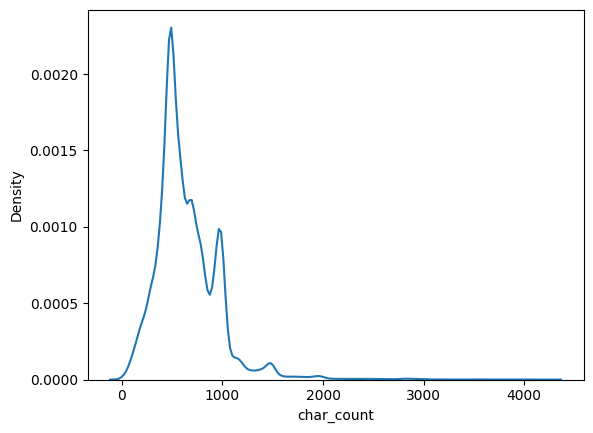

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(cleansed['char_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2c99c34a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2c99c3a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2c99c3230>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2c9a100b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2c9a103e0>],
 'means': []}

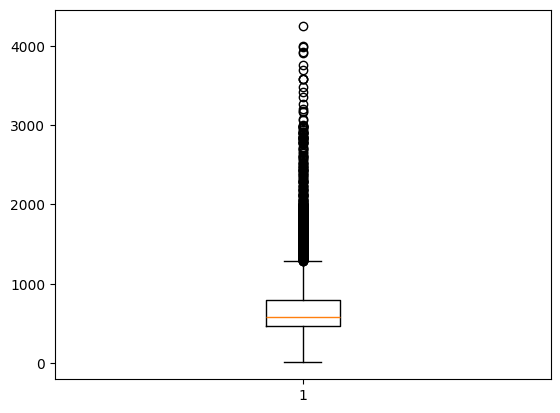

In [348]:
plt.boxplot(cleansed['char_count'])

In [352]:
cleansed['brevity_check'] = cleansed['answer'].apply(lambda x: False if len(x) > 500 else True)
cleansed['brevity_check'].value_counts()

brevity_check
False    16376
True     11404
Name: count, dtype: int64